In [62]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random
import csv
import io

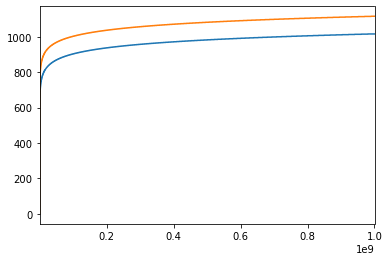

In [66]:
def estimate_gen(start_x, n_members):
    def estimate(net_worth):
        if net_worth < start_x:
            return 0
        return n_members / 9 * math.log10(net_worth - start_x + 1)
    return estimate

START_X = 240_000
MAX_X = 10**9
N_MEMBERS = 1017
estimate = estimate_gen(START_X, N_MEMBERS)

prev = 0
xs = []
ys = []
for x in range(0, MAX_X, 1000):
    xs.append(x)
    e = estimate(x)
    if e > 0:
        e += random.randrange(0, 100)
    y = int(round(max(prev, e)))
    prev = y
    ys.append(y)

x = np.array(xs)
y = np.vectorize(estimate)(x)
d = np.array(ys, dtype=np.int64)
plt.xlim([START_X, MAX_X])
plt.plot(x, y, x, d)

In [67]:
def csv_write(filename, l):
    with io.open(filename, 'w', newline='\n') as f:
        w = csv.writer(f)
        for i in l:
            w.writerow([i])
csv_write('interest.csv', ys)